# Tugas Praktikum

In [ ]:
# Load Data
df_wbc = pd.read_csv("wbc (2).csv")

# Separate features and target
y_wbc = df_wbc["diagnosis"]
X_wbc = df_wbc.drop(columns=["diagnosis", "id", "Unnamed: 32"]) # "id" and "Unnamed: 32" are not useful

# Display the first few rows of the features and target
print("Features (X_wbc):")
display(X_wbc.head())
print("\nTarget (y_wbc):")
display(y_wbc.head())

Features (X_wbc):


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



Target (y_wbc):


,diagnosis
0,M
1,M
2,M
3,M
4,M


## Langkah 2 - Encoding Target dan Standardisasi Fitur Numerik

In [ ]:
# Encoding target variable
y_wbc_encoded = y_wbc.map({'M': 1, 'B': 0})

# Identify numerical columns
num_cols_wbc = X_wbc.select_dtypes(include=np.number).columns

# Create preprocessing pipelines for numerical features
num_tf_wbc = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Combine preprocessing steps for numerical features
preprocess_wbc = ColumnTransformer([
    ("num", num_tf_wbc, num_cols_wbc),
])

print("Encoded target variable (y_wbc_encoded):")
display(y_wbc_encoded.head())

Encoded target variable (y_wbc_encoded):


,diagnosis
0,1
1,1
2,1
3,1
4,1


## Langkah 3 - Seleksi Fitur dan Uji Model

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Seleksi fitur dengan SelectKBest (using f_classif as the score function)
# We will use k=10 initially and analyze the results to determine the best number of features
selector_filter_wbc = SelectKBest(score_func=f_classif, k=10)

# Buat pipeline final
pipe_filter_wbc = Pipeline([
    ("prep", preprocess_wbc), # menjalankan pipeline preprocessing
    ("sel", selector_filter_wbc), # menjalankan pipeline seleksi fitur
    ("clf", LogisticRegression(max_iter=1000)) # uji dengan model sederhana -> Logistic Regression
])

# Lakukan pelatihan dan uji model
X_train_wbc, X_test_wbc, y_train_wbc, y_test_wbc = train_test_split(X_wbc, y_wbc_encoded, stratify=y_wbc_encoded, test_size=0.2, random_state=42)

pipe_filter_wbc.fit(X_train_wbc, y_train_wbc)
pred_wbc = pipe_filter_wbc.predict(X_test_wbc)

print("=== Filter (ANOVA) + LR ===")
print("Accuracy:", accuracy_score(y_test_wbc, pred_wbc))
print(classification_report(y_test_wbc, pred_wbc))

=== Filter (ANOVA) + LR ===
Accuracy: 0.956140350877193
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



## Langkah 4 - Menentukan Jumlah Fitur Terbaik dan Mengidentifikasi Fitur-Fitur Terpilih

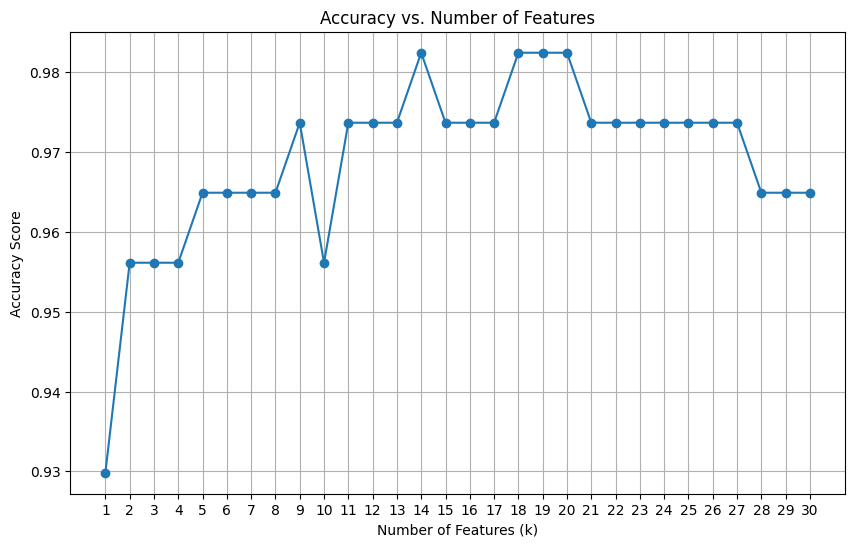


Best number of features (k): 14
Best accuracy score: 0.9824561403508771

Selected features with the best k:
['num__radius_mean' 'num__perimeter_mean' 'num__area_mean'
 'num__compactness_mean' 'num__concavity_mean' 'num__concave points_mean'
 'num__radius_se' 'num__perimeter_se' 'num__radius_worst'
 'num__perimeter_worst' 'num__area_worst' 'num__compactness_worst'
 'num__concavity_worst' 'num__concave points_worst']


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Create empty lists to store accuracy scores for different k values
accuracy_scores = []
k_values = range(1, X_wbc.shape[1] + 1)  # Iterate through all possible number of features

for k in k_values:
    # Create a new pipeline with SelectKBest for the current k
    pipe_filter_wbc_k = Pipeline([
        ("prep", preprocess_wbc),
        ("sel", SelectKBest(score_func=f_classif, k=k)),
        ("clf", LogisticRegression(max_iter=1000))
    ])

    # Train and evaluate the model
    pipe_filter_wbc_k.fit(X_train_wbc, y_train_wbc)
    pred_wbc_k = pipe_filter_wbc_k.predict(X_test_wbc)
    accuracy_k = accuracy_score(y_test_wbc, pred_wbc_k)
    accuracy_scores.append(accuracy_k)

# Plot the accuracy scores for different k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel("Number of Features (k)")
plt.ylabel("Accuracy Score")
plt.title("Accuracy vs. Number of Features")
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Find the best k based on the highest accuracy score
best_k_index = np.argmax(accuracy_scores)
best_k = k_values[best_k_index]
best_accuracy = accuracy_scores[best_k_index]

print(f"\nBest number of features (k): {best_k}")
print(f"Best accuracy score: {best_accuracy}")

# Get the names of the features selected with the best k
selector_filter_best_k = SelectKBest(score_func=f_classif, k=best_k)
pipe_filter_best_k = Pipeline([
    ("prep", preprocess_wbc),
    ("sel", selector_filter_best_k),
    ("clf", LogisticRegression(max_iter=1000))
])

pipe_filter_best_k.fit(X_train_wbc, y_train_wbc)

# Get the feature names after preprocessing
feature_names_out = pipe_filter_best_k.named_steps["prep"].get_feature_names_out()

# Get the mask of selected features from SelectKBest
selected_mask = pipe_filter_best_k.named_steps["sel"].get_support()

# Get the names of the selected features
selected_features = feature_names_out[selected_mask]

print("\nSelected features with the best k:")
print(selected_features)